# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big           

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features_full, test_features, train_target_full, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features_full.shape)
print(train_target_full.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


In [14]:
train_features, validation_features, train_target, validation_target = train_test_split(
    train_features_full, train_target_full, 
    test_size = 100, random_state = 99)

In [15]:
print(train_features.shape)
print(train_target.shape)
print(validation_features.shape)
print(validation_target.shape)
print(test_features.shape)
print(test_target.shape)

(400, 13)
(400,)
(100, 13)
(100,)
(145, 13)
(145,)


# 四、自编码器

In [16]:
from tensorflow import keras

In [17]:
encoder = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[13]),
    keras.layers.Dense(2)])

In [18]:
decoder = keras.models.Sequential([
    keras.layers.Dense(13)])

In [19]:
autoencoder = keras.models.Sequential([encoder, decoder])

In [20]:
autoencoder.compile(loss="mse", metrics='mae')

In [21]:
autoencoder.fit(train_features, train_features, epochs=500,
               validation_data=(validation_features,validation_target))

Epoch 1/500
13/13 [==============================] - 0s 11ms/step - loss: 16.4608 - mae: 2.5792 - val_loss: 5.6424 - val_mae: 1.6474
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 15.0195 - mae: 2.4594 - val_loss: 4.6526 - val_mae: 1.4814
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 14.1563 - mae: 2.3822 - val_loss: 4.0225 - val_mae: 1.3696
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 13.4542 - mae: 2.3105 - val_loss: 3.6109 - val_mae: 1.2925
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 12.8020 - mae: 2.2392 - val_loss: 3.3659 - val_mae: 1.2480
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 12.2122 - mae: 2.1707 - val_loss: 3.2410 - val_mae: 1.2324
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 11.6651 - mae: 2.1081 - val_loss: 3.2088 - val_mae: 1.2341
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 11

Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4982 - mae: 0.7874 - val_loss: 10.3220 - val_mae: 2.3952
Epoch 64/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4905 - mae: 0.7848 - val_loss: 10.3220 - val_mae: 2.3949
Epoch 65/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4846 - mae: 0.7834 - val_loss: 10.1824 - val_mae: 2.3772
Epoch 66/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4775 - mae: 0.7815 - val_loss: 10.1197 - val_mae: 2.3660
Epoch 67/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4726 - mae: 0.7794 - val_loss: 10.1286 - val_mae: 2.3684
Epoch 68/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4675 - mae: 0.7775 - val_loss: 10.2073 - val_mae: 2.3755
Epoch 69/500
13/13 [==============================] - 0s 3ms/step - loss: 1.4631 - mae: 0.7757 - val_loss: 10.3101 - val_mae: 2.3866
Epoch 70/500
13/13 [==============================] - 0s 3ms/step - l

13/13 [==============================] - 0s 4ms/step - loss: 1.3518 - mae: 0.7154 - val_loss: 10.2710 - val_mae: 2.3688
Epoch 125/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3511 - mae: 0.7150 - val_loss: 10.3118 - val_mae: 2.3757
Epoch 126/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3509 - mae: 0.7145 - val_loss: 10.2903 - val_mae: 2.3726
Epoch 127/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3496 - mae: 0.7144 - val_loss: 10.4045 - val_mae: 2.3845
Epoch 128/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3482 - mae: 0.7137 - val_loss: 10.3596 - val_mae: 2.3802
Epoch 129/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3481 - mae: 0.7132 - val_loss: 10.0848 - val_mae: 2.3475
Epoch 130/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3470 - mae: 0.7123 - val_loss: 10.3251 - val_mae: 2.3767
Epoch 131/500
13/13 [==============================] - 0s 3ms/step - loss: 1

13/13 [==============================] - 0s 4ms/step - loss: 1.3244 - mae: 0.6948 - val_loss: 10.3639 - val_mae: 2.3751
Epoch 186/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3243 - mae: 0.6949 - val_loss: 10.2982 - val_mae: 2.3687
Epoch 187/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3233 - mae: 0.6939 - val_loss: 10.2681 - val_mae: 2.3649
Epoch 188/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3234 - mae: 0.6947 - val_loss: 10.3016 - val_mae: 2.3680
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3236 - mae: 0.6944 - val_loss: 10.3164 - val_mae: 2.3709
Epoch 190/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3236 - mae: 0.6947 - val_loss: 10.3799 - val_mae: 2.3776
Epoch 191/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3230 - mae: 0.6936 - val_loss: 10.2107 - val_mae: 2.3586
Epoch 192/500
13/13 [==============================] - 0s 4ms/step - loss: 1

13/13 [==============================] - 0s 4ms/step - loss: 1.3185 - mae: 0.6891 - val_loss: 10.3610 - val_mae: 2.3781
Epoch 247/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3187 - mae: 0.6897 - val_loss: 10.3405 - val_mae: 2.3741
Epoch 248/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3185 - mae: 0.6893 - val_loss: 10.4062 - val_mae: 2.3829
Epoch 249/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3190 - mae: 0.6895 - val_loss: 10.3478 - val_mae: 2.3755
Epoch 250/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3178 - mae: 0.6896 - val_loss: 10.3487 - val_mae: 2.3749
Epoch 251/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3186 - mae: 0.6896 - val_loss: 10.4031 - val_mae: 2.3812
Epoch 252/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3185 - mae: 0.6894 - val_loss: 10.3411 - val_mae: 2.3741
Epoch 253/500
13/13 [==============================] - 0s 3ms/step - loss: 1

13/13 [==============================] - 0s 4ms/step - loss: 1.3180 - mae: 0.6891 - val_loss: 10.3415 - val_mae: 2.3758
Epoch 308/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3165 - mae: 0.6883 - val_loss: 10.3081 - val_mae: 2.3703
Epoch 309/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3170 - mae: 0.6879 - val_loss: 10.3705 - val_mae: 2.3790
Epoch 310/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3171 - mae: 0.6883 - val_loss: 10.2939 - val_mae: 2.3697
Epoch 311/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3169 - mae: 0.6882 - val_loss: 10.3861 - val_mae: 2.3792
Epoch 312/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3170 - mae: 0.6882 - val_loss: 10.3375 - val_mae: 2.3754
Epoch 313/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3170 - mae: 0.6886 - val_loss: 10.3309 - val_mae: 2.3730
Epoch 314/500
13/13 [==============================] - 0s 3ms/step - loss: 1

13/13 [==============================] - 0s 3ms/step - loss: 1.3162 - mae: 0.6877 - val_loss: 10.3698 - val_mae: 2.3805
Epoch 369/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3167 - mae: 0.6878 - val_loss: 10.3876 - val_mae: 2.3820
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3162 - mae: 0.6876 - val_loss: 10.2584 - val_mae: 2.3681
Epoch 371/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3169 - mae: 0.6883 - val_loss: 10.4123 - val_mae: 2.3867
Epoch 372/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3164 - mae: 0.6879 - val_loss: 10.2295 - val_mae: 2.3642
Epoch 373/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3168 - mae: 0.6880 - val_loss: 10.3690 - val_mae: 2.3818
Epoch 374/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3161 - mae: 0.6880 - val_loss: 10.2730 - val_mae: 2.3685
Epoch 375/500
13/13 [==============================] - 0s 4ms/step - loss: 1

13/13 [==============================] - 0s 3ms/step - loss: 1.3165 - mae: 0.6875 - val_loss: 10.2224 - val_mae: 2.3638
Epoch 430/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3166 - mae: 0.6878 - val_loss: 10.3538 - val_mae: 2.3790
Epoch 431/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3162 - mae: 0.6874 - val_loss: 10.2670 - val_mae: 2.3683
Epoch 432/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3161 - mae: 0.6873 - val_loss: 10.3634 - val_mae: 2.3809
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3164 - mae: 0.6874 - val_loss: 10.2925 - val_mae: 2.3710
Epoch 434/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3170 - mae: 0.6876 - val_loss: 10.5058 - val_mae: 2.3969
Epoch 435/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3160 - mae: 0.6874 - val_loss: 10.3463 - val_mae: 2.3788
Epoch 436/500
13/13 [==============================] - 0s 3ms/step - loss: 1

13/13 [==============================] - 0s 3ms/step - loss: 1.3165 - mae: 0.6869 - val_loss: 10.3160 - val_mae: 2.3729
Epoch 491/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3162 - mae: 0.6873 - val_loss: 10.3690 - val_mae: 2.3808
Epoch 492/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3166 - mae: 0.6871 - val_loss: 10.3517 - val_mae: 2.3781
Epoch 493/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3162 - mae: 0.6871 - val_loss: 10.3338 - val_mae: 2.3761
Epoch 494/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3163 - mae: 0.6871 - val_loss: 10.3264 - val_mae: 2.3756
Epoch 495/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3162 - mae: 0.6876 - val_loss: 10.3570 - val_mae: 2.3787
Epoch 496/500
13/13 [==============================] - 0s 3ms/step - loss: 1.3161 - mae: 0.6874 - val_loss: 10.3250 - val_mae: 2.3760
Epoch 497/500
13/13 [==============================] - 0s 4ms/step - loss: 1

In [22]:
train_codings = encoder.predict(train_features)

In [23]:
train_codings.shape

(400, 2)

In [24]:
test_codings = encoder.predict(test_features)

In [25]:
test_codings.shape

(145, 2)

# 四、建立模型

In [26]:
import matplotlib.pyplot as plt

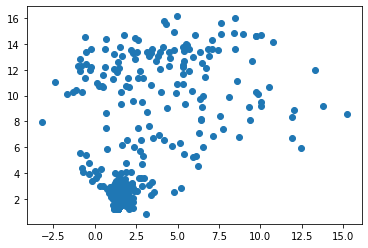

In [27]:
plt.scatter(train_codings[:,0],train_codings[:,1])

In [28]:
from sklearn.svm import SVC

In [29]:
svc_linear = SVC(kernel = "linear")

In [30]:
svc_linear.fit(train_codings, train_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
test_predict = svc_linear.predict(test_codings)
test_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [32]:
svc_linear.score(test_codings,test_target)

0.9793103448275862